In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("datasets/shopping.csv")
df.iloc[np.r_[0,3, -3, -1]]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
3,4,Female,23,16,77
197,198,Male,32,126,74
199,200,Male,30,137,83


In [4]:
df = pd.read_csv("datasets/shopping.csv")
df.rename(columns={
    "Annual Income (k$)":"AnnualIncome", 
    "Spending Score (1-100)":"SpendingScore"
}, inplace=True)
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Genre,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


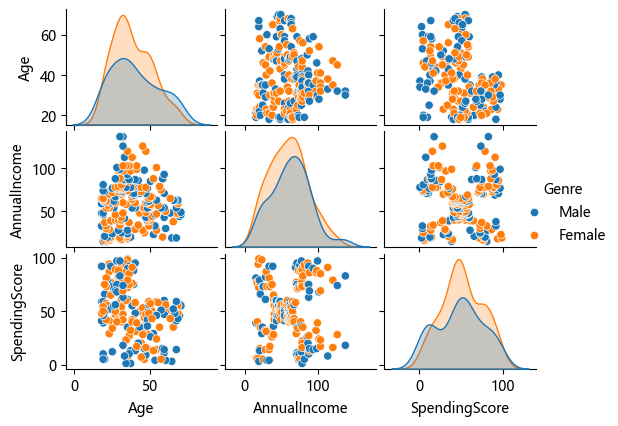

In [5]:
g = sns.pairplot(df, hue="Genre");
g.fig.set_size_inches(6, 4)

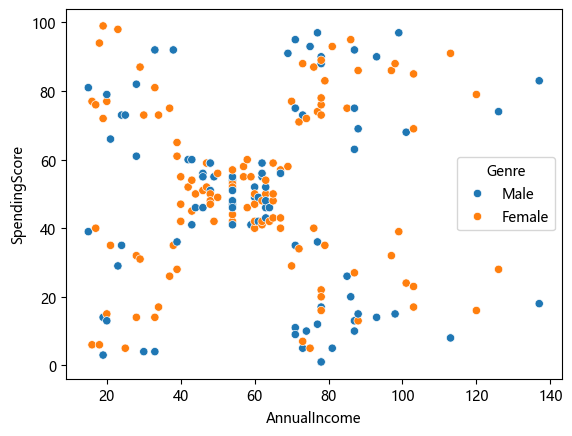

In [6]:
sns.scatterplot(x="AnnualIncome", y="SpendingScore", hue="Genre", data=df);

In [59]:
income_spending = df[["AnnualIncome","SpendingScore"]].to_numpy()
income_spending.shape

(200, 2)

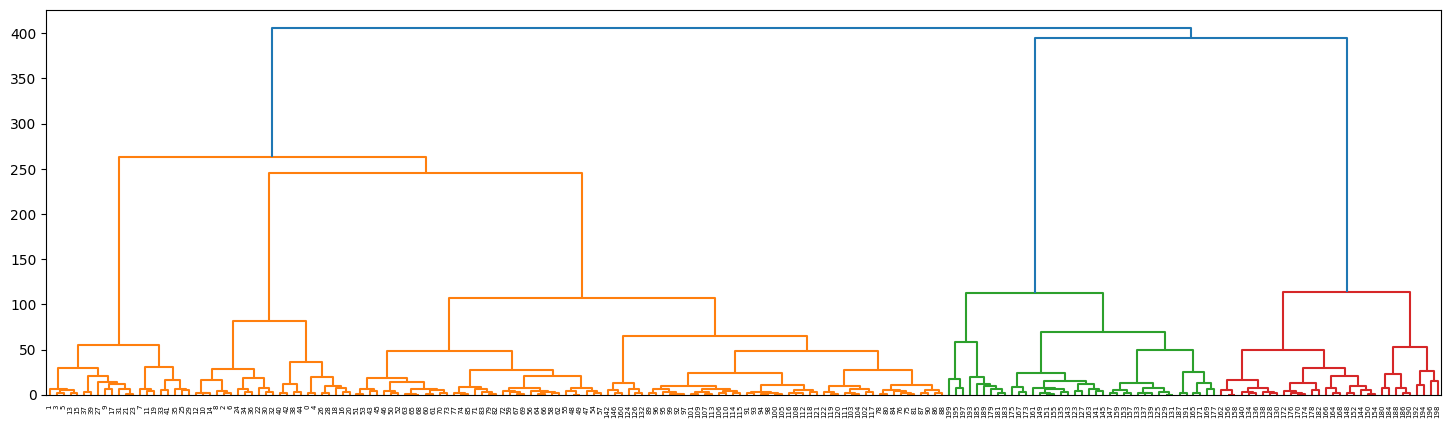

In [61]:
import scipy.cluster.hierarchy as hierarchy
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))
linkage = hierarchy.linkage(income_spending, method='ward', metric="euclidean")
shc.dendrogram(Z=linkage);

In [129]:
def plot_clusters(dat, labels, xlab=None, ylab=None, ax=None):
    for lab in np.unique(labels):
        d = dat[labels == lab]
        ax.scatter(d[:,0], d[:,1], label=f"{lab}", alpha=0.7)
        
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.legend()


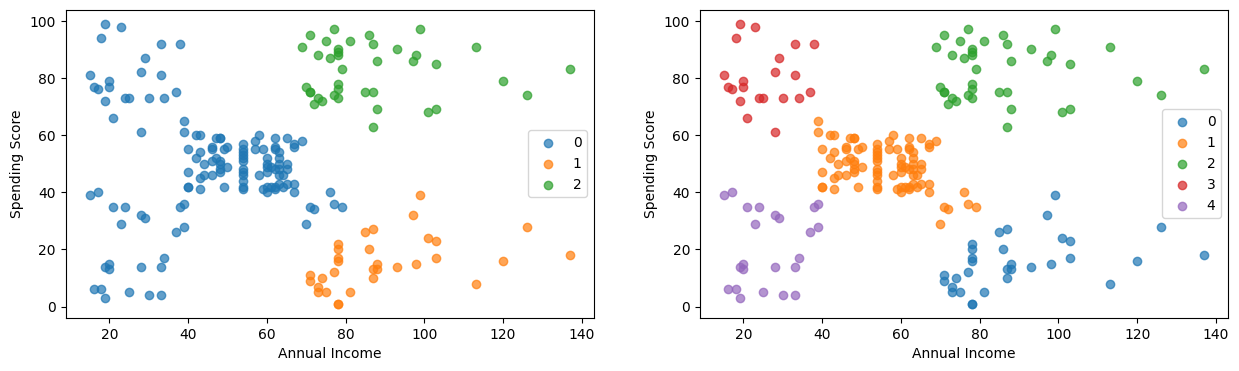

In [130]:
from sklearn.cluster import AgglomerativeClustering
cluster_3 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels_3 = cluster_3.fit_predict(income_spending)

cluster_5 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels_5 = cluster_5.fit_predict(income_spending)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

plot_clusters(income_spending, labels=labels_3, xlab="Annual Income", ylab="Spending Score", ax=axes[0])
plot_clusters(income_spending, labels=labels_5, xlab="Annual Income", ylab="Spending Score", ax=axes[1])

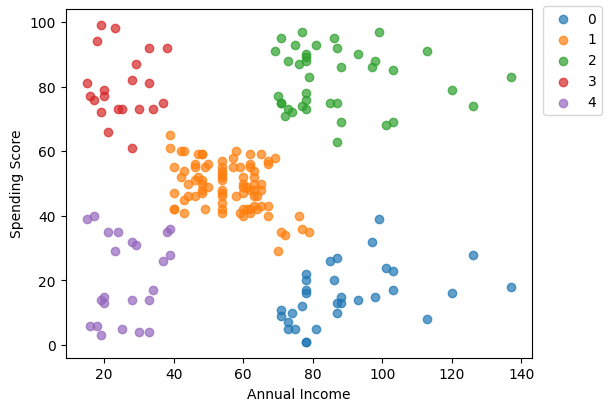

In [96]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(income_spending)

fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')

for lab in np.unique(labels):
    dat = income_spending[labels == lab]
    ax.scatter(dat[:,0], dat[:,1], label=f"{lab}", alpha=0.7)
ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
fig.legend(loc='outside right upper');

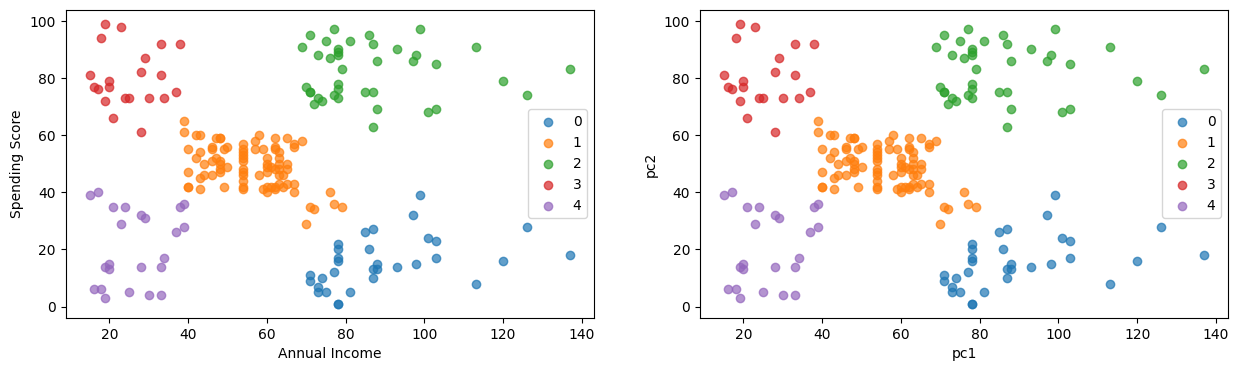

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.cluster import AgglomerativeClustering
m1 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels1 = m1.fit_predict(income_spending)

ss = StandardScaler()
scaled_data = ss.fit_transform(income_spending)
pca = PCA(n_components=2)
pcs = pca.fit_transform(income_spending)

labels2 = m1.fit_predict(pcs)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

plot_clusters(income_spending, labels=labels1, xlab="Annual Income", ylab="Spending Score", ax=axes[0])
plot_clusters(income_spending, labels=labels2, xlab="pc1", ylab="pc2", ax=axes[1])


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA


# 批发商客户数据

数据来自于某批发商，包括了客户以货币单位计算的不同产品类别的年度支出。

1. FRESH：新鲜产品的年度支出；
1. MILK：牛奶产品的年度支出；
1. GROCERY：杂货产品的年度支出；
1. FROZEN：冷冻产品的年度支出。
1. DETERGENTS_PAPER：洗涤剂和纸制品的年度支出。
1. DELICATESSEN: 熟食产品的年度消费； 
1. CHANNEL：客户的渠道--Horeca（Hotel/Restaurant/Caf）或Retail channel(零售渠道)。
1. REGION：客户的地区 - Lisnon（利斯农）、Oporto（波尔图）或其他。

> Cardoso,Margarida. (2014). Wholesale customers. UCI Machine Learning Repository. https://doi.org/10.24432/C5030X.

In [10]:
wholesale = pd.read_csv("datasets/wholesale_customers.csv")
wholesale.head(2)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


In [16]:
wholesale.shape

(440, 8)

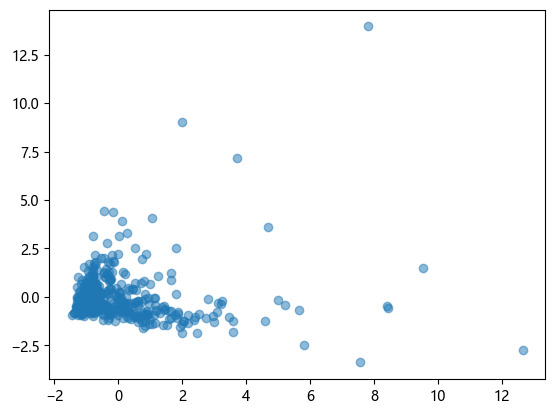

In [11]:
dat1 = wholesale.loc[:, "Fresh":"Delicassen"].to_numpy()
dat1

ss = StandardScaler()
scaled_data = ss.fit_transform(dat1)
pca = PCA()
pcs = pca.fit_transform(scaled_data)

plt.scatter(pcs[:,0], pcs[:,1], alpha=0.5);

In [162]:
pca.explained_variance_ratio_

array([0.44082893, 0.283764  , 0.12334413, 0.09395504, 0.04761272,
       0.01049519])

In [15]:
pca.explained_variance_ratio_[:2].sum()

np.float64(0.7245929240774496)

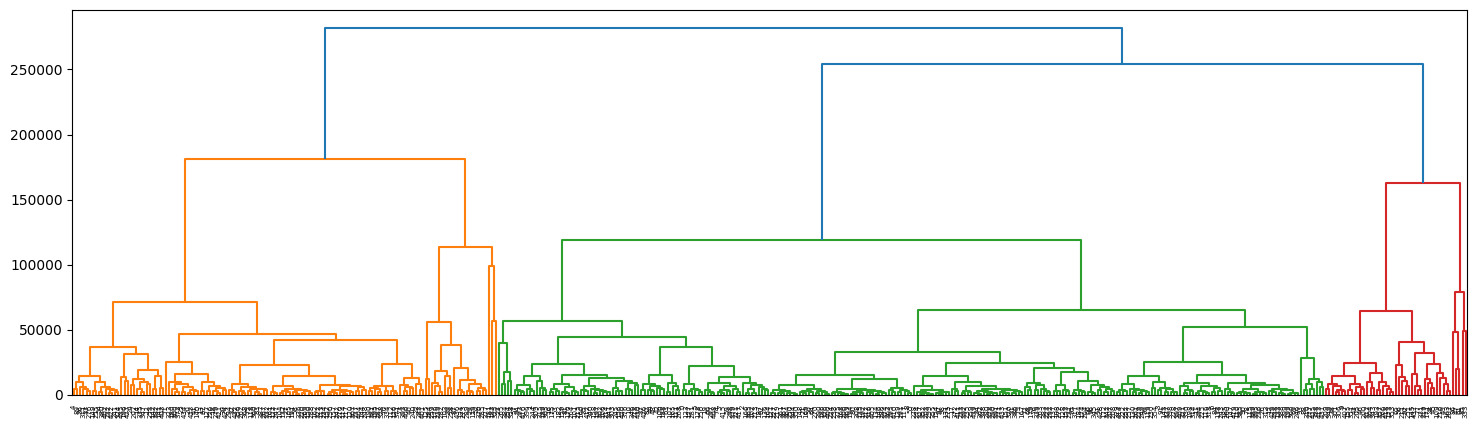

In [165]:
import scipy.cluster.hierarchy as hierarchy

plt.figure(figsize=(18, 5))
linkage = hierarchy.linkage(dat1, method='ward', metric="euclidean")
shc.dendrogram(Z=linkage);

In [17]:

from sklearn.cluster import AgglomerativeClustering
m1 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels1 = m1.fit_predict(dat1)


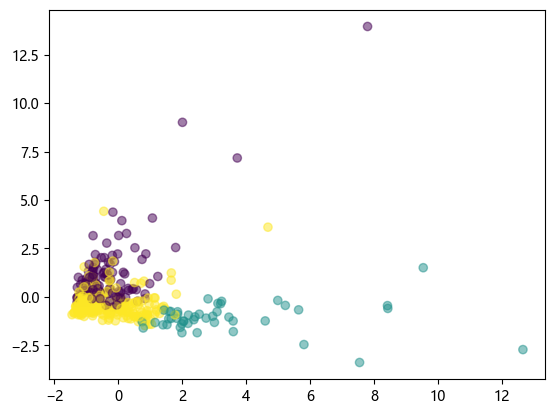

In [18]:
ss = StandardScaler()
scaled_data = ss.fit_transform(dat1)
pca = PCA()
pcs = pca.fit_transform(scaled_data)

plt.scatter(pcs[:,0], pcs[:,1], c=labels1, alpha=0.5);

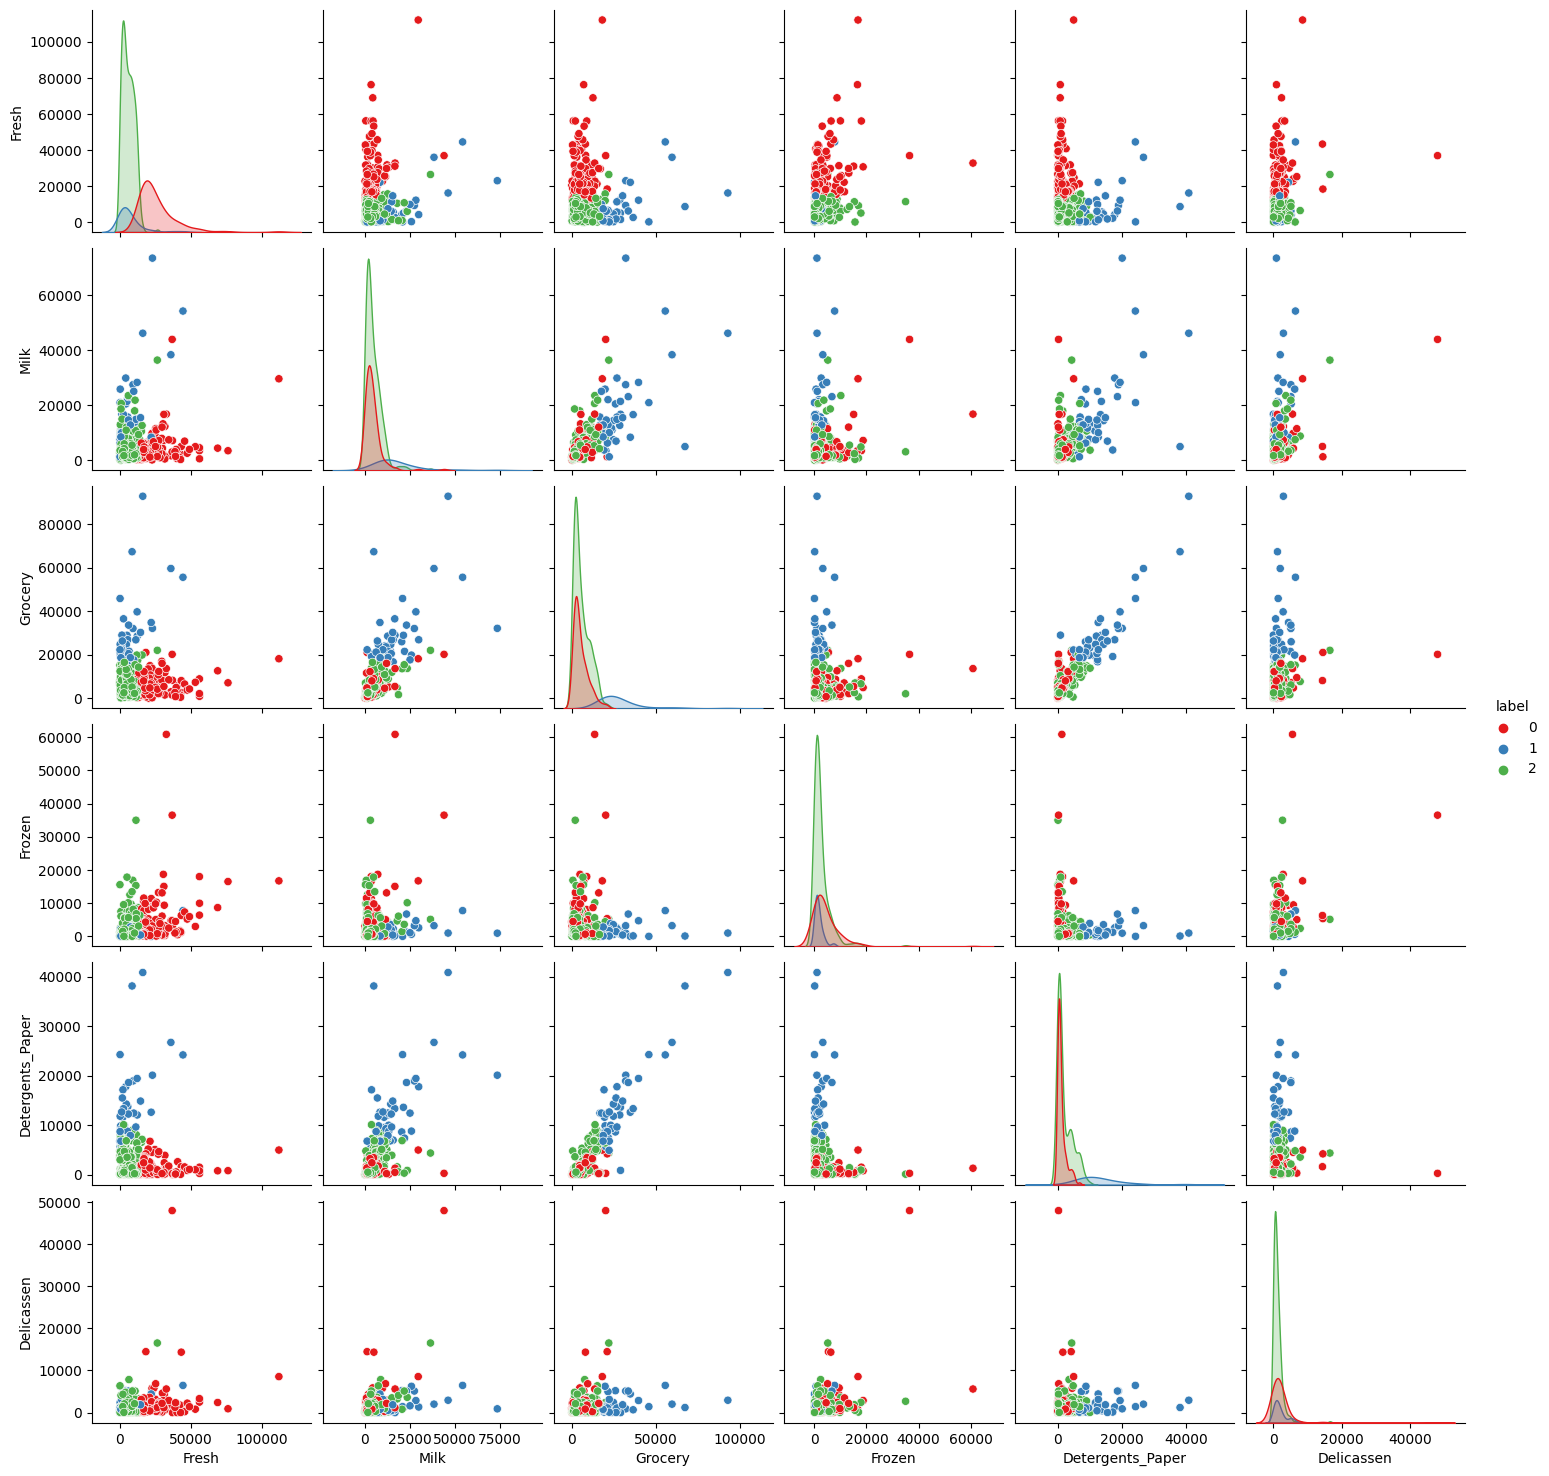

In [179]:
dat2 = wholesale.loc[:, "Fresh":"Delicassen"].copy()
dat2["label"] = labels1

sns.pairplot(data=dat2, hue="label", palette='Set1');

(array([-1,  0,  1,  2,  3]), array([103,  80, 186,  49,  22]))


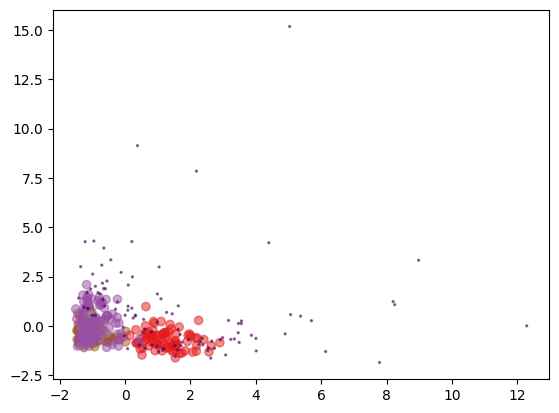

In [238]:
scaled_data = StandardScaler().fit_transform(wholesale)
m2 = DBSCAN(eps=1, min_samples=10)
m2.fit(scaled_data)

print(np.unique(m2.labels_, return_counts=True))

pca = PCA()
pcs = pca.fit_transform(scaled_data)

plt.scatter(pcs[m2.labels_ != -1,0], pcs[m2.labels_ != -1,1], c=m2.labels_[m2.labels_ != -1], alpha=0.5, cmap="Set1");
plt.scatter(pcs[m2.labels_ == -1,0], pcs[m2.labels_ == -1,1], c=m2.labels_[m2.labels_ == -1], s=2, alpha=0.5);

In [230]:
dat3 = pd.DataFrame(pcs)
dat3.drop(columns=[5,6,7], inplace=True)
dat3["label"] = m2.labels_
dat3.head(3)

,0,1,2,3,4,label
0,0.843939,-0.515351,-0.767632,-0.044215,-0.446234,0
1,1.062676,-0.484601,-0.672975,0.401372,-0.130458,0
2,1.269141,0.682055,-0.664095,1.634953,-1.193813,-1


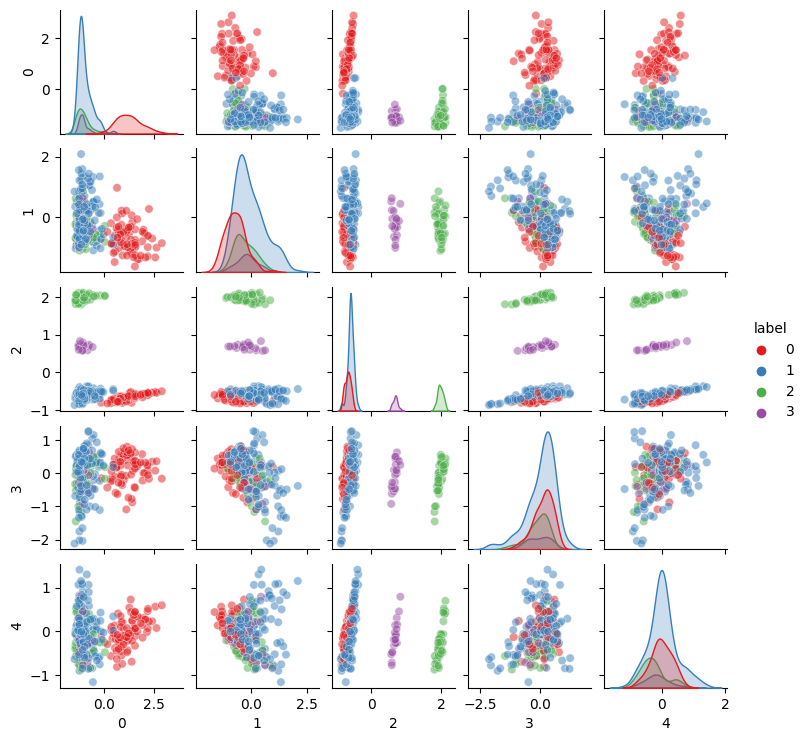

In [237]:
sns.pairplot(dat3[dat3.label != -1], hue="label", plot_kws={'alpha':0.5}, height=1.5, palette="Set1");

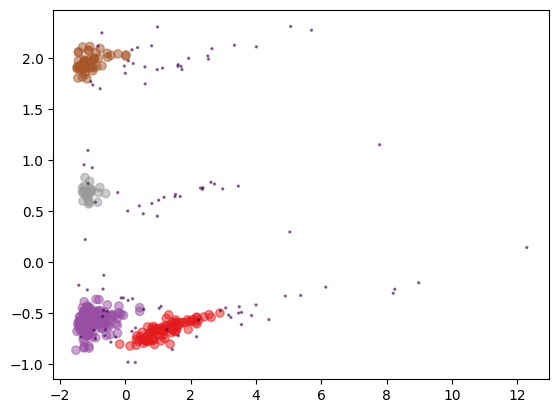

In [220]:
plt.scatter(pcs[m2.labels_ != -1,0], pcs[m2.labels_ != -1,2], c=m2.labels_[m2.labels_ != -1], alpha=0.5, cmap="Set1");
plt.scatter(pcs[m2.labels_ == -1,0], pcs[m2.labels_ == -1,2], c=m2.labels_[m2.labels_ == -1], s=2, alpha=0.5);

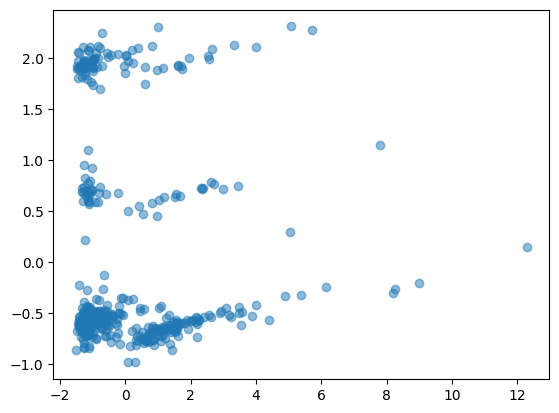

In [223]:
plt.scatter(pcs[:,0], pcs[:,2], alpha=0.5);